### Team Members:
            Erick Kramer
            Mihir Patil
            Sushma Devaramani

### 1. Implement a simulation of the k-armed bandits environment with a variable value of k and a random p_i probabilities to obtain a reward of 0 or 1 from pulling each machine. Probabilities should be different each time you instance the environment.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

* In this code we create the k-armed bandits environment with varying number of bandits and random probabilities. The aim is to pull the bandits/arm in a sequence such that we obtain maximum reward in the long run. 

* We define the Bandit and Agent classes. 

* Bandit class: Initializes the k-numbered bandits and probabilities. The class also has a function that returns the reward of 1 or 0.

In [19]:
class Bandit:
    def __init__(self, num_bandits, bandit_probs):
        self.k = num_bandits # Number of bandits
        self.probs = bandit_probs # 
        
    def get_reward(self,action):
        p_i = np.round(np.random.random(),2)
        reward = 1 if (p_i < self.probs[action]) else 0
#         print(' Reward calculated')
        return reward


* We implement an epsilon-greedy agent to play the k-armed bandit for a fixed number of episodes. The agent class is initialized with number of episodes. A epsilon value is specified to control the type of agent (Explorer or greedy). 
* A action-value Q is defined to represent the expected reward. The formula to compute action value is,

$$ Q_{k+1}(a) = Q_k(a) + \frac{1}{k+1}(r_{k+1}(a) - Q_k(a))$$ 
 

In [20]:
class Agent:
    def __init__(self, bandit, epsilon):
        # epsilon to control the type of agent (Explorer or greedy)
        self.epsilon = epsilon
        # number of times action was chosen
        self.n_actions = np.zeros(bandit.k, dtype=np.int) 
        # Estimated values
        self.Q = np.zeros(bandit.k, dtype=np.float)
    
    # Update Q action-value based on the formula
    # Q(a) = Q(a) + 1/(k+1) * (r(a) - Q(a))
    def update_Q(self, action, reward):
        self.n_actions[action] += 1
        self.Q[action] += (1/self.n_actions[action]) * (reward - self.Q[action])
        
    def choose_action(self, bandit, force_explore=False):
        rand = np.round(np.random.random(),2)
#         print(' rand: ', rand)
        if (rand < self.epsilon) or force_explore:
#             print(' I wanna explore')
            action_explore = np.random.randint(bandit.k) #Explore random bandits?
            return action_explore
        else:
#             print(' I wanna stay')
#             print(' Q', self.Q)
#             print(' Q_max:', self.Q.max())
#             print (' flat: ',np.flatnonzero(self.Q == self.Q.max()))
            action_greedy = np.random.choice(np.flatnonzero(self.Q == self.Q.max()))
            return action_greedy       

Running the experiment:
* Each experiment runs N episodes.
* In each episode, for every bandits, the corresponding action-value is updated and reward is computed.
* The action values and rewards for each bandits are stored.
* We run the experiment to obtain the optimal policy.

In [21]:
def experiment(agent, bandit, N_episodes):
        action_history = []
        reward_history = []
        reward_per_bandit = np.zeros(bandit.k, dtype=np.float)
        
        for episode in range(N_episodes):
            # Choose action from agent 
            action = agent.choose_action(bandit)
#             print(' Corresponding action: ', action)
            reward = bandit.get_reward(action)
            reward_per_bandit[action] += reward
#             print(' r: ', reward)
            agent.update_Q(action, reward)
            action_history.append(action)
            reward_history.append(reward)
        return np.array(action_history), np.array(reward_history), reward_per_bandit

### 2.- Build an algorithm that implements one of the exploration strategies and run it for a specified amount of time on k=10 armed bandits. Gather the obtained rewards and use them to train a supervised model that estimates the value of pulling each of the k machines

### k-bandit simulation
* We initilaize the number of bandits, epsilon value, number of episodes and number of experiments to conduct.
* A bandit and agent is initialized. Then experiment is conducted for n episodes.
* At the end of each experiment, the rewards are summed to get the total reward per bandit.

In [22]:
# number of bandits
num_bandits = 10
epsilon = 0.1
n_episodes = 10000
n_experiments = 20

print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

reward_history_avg = np.zeros(n_episodes)
action_history_sum = np.zeros((n_episodes, num_bandits))

bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

best_bandit = np.argmax(bandit_probs)
print(' Probabilities calculated', bandit_probs)
print(' Best bandit is ', best_bandit+1)

# --------------------- 
#  Single experiment         
# ---------------------
bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
agent = Agent(bandit, epsilon) # Initialize agents

action_history, reward_history, reward_per_bandit = experiment(agent, bandit, n_episodes)

#     print(' Action history: ', action_history)

    # Sum up experiment reward 
reward_history_avg += reward_history
# print(' Reward history avg: ', reward_history_avg)

    # Sum up action history
for episodes_idx, (a) in enumerate(action_history): 
    action_history_sum[episodes_idx][a] += 1
    
# reward_history_avg /= np.float(n_experiments)

# print(' reward history avg = {}'.format(reward_history_avg))

expected_reward = np.round(reward_per_bandit/agent.n_actions,2)

print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

print(' Total rewards per bandit = {}'.format(reward_per_bandit))

print(' Number of actions activated = {}'.format(agent.n_actions))

print(' Expected reward for pulling each arm = {}'.format(expected_reward))

best_found_bandit = np.argmax(expected_reward)+1
print(' Best bandit found is {}'.format(best_found_bandit))

 Running bandits experiment with 10 bandits and agent with epsilon of 0.1
(' Probabilities calculated', [0.65, 0.07, 0.08, 0.33, 0.95, 0.47, 0.85, 0.45, 1.0, 0.33])
(' Best bandit is ', 9)
 Action of last episode = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 Total rewards per bandit = [  62.    5.    9.   36. 1845.  937.   82.  803. 1862.  625.]
 Number of actions activated = [  98  104  108   97 1941 1988   95 1841 1873 1855]
 Expected reward for pulling each arm = [0.63 0.05 0.08 0.37 0.95 0.47 0.86 0.44 0.99 0.34]
 Best bandit found is 9


### 3.- Using the learned model, estimate a policy for the environment and execute it on the same environment (with the same probabilities). Report the obtained results.

* The calculated probabilities is shown above.
* The empirical estimates reported above are already a supervised learning model.


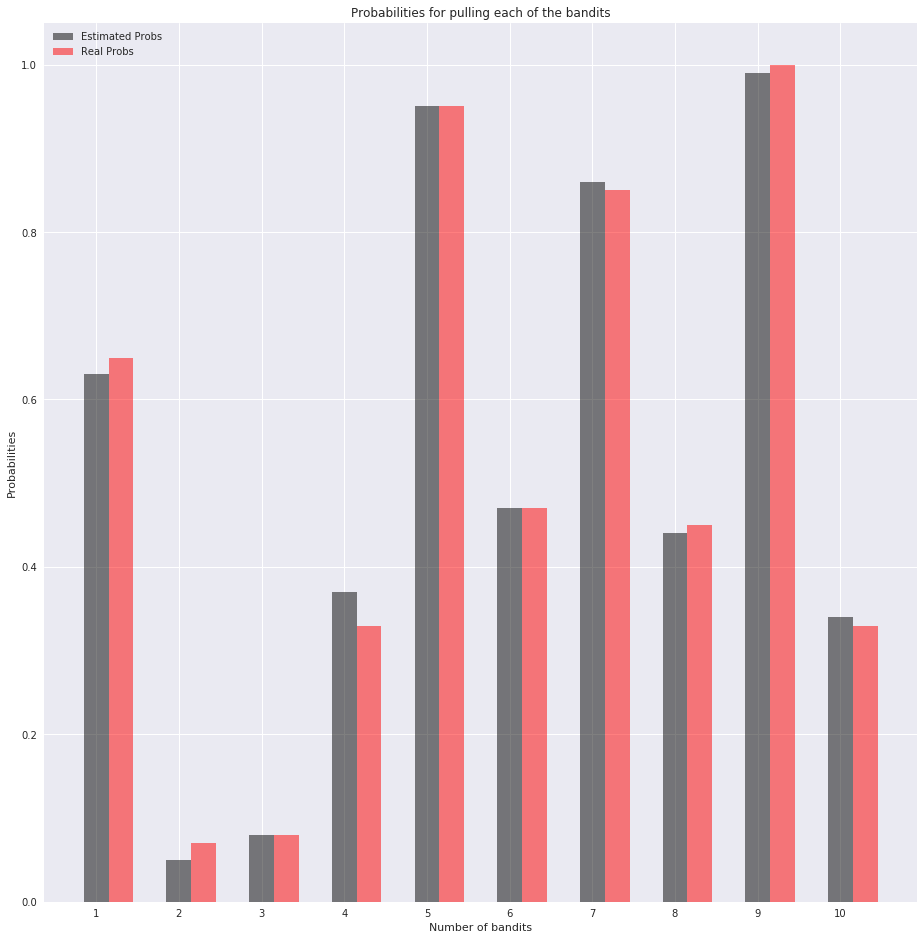

In [23]:
colors = ['b','g']
k_bandits = np.arange(1,11)
#plots the histogram
plt.figure(figsize=(13,13))
plt.bar(k_bandits,expected_reward,color='k',label='Estimated Probs', alpha=0.5,\
        align='center',width=0.3)
plt.bar(k_bandits+0.3,bandit_probs,color='r',label='Real Probs', alpha=0.5,\
        align='center',width=0.3)
# plt.xticks(range(1,num_bandits+1))
plt.xticks(k_bandits)
plt.xlabel('Number of bandits')
plt.ylabel('Probabilities')
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Probabilities for pulling each of the bandits')
plt.show()

The plot shows the expected and actual probabilities for each bandits

### 4. Repeat parts 2 and 3, but now automate it with code and vary from 10 to 1000 in steps of 10/50 as appropriate. 
   #### 4.1) Report if increasing the value of k makes the problem harder, using several metrics like
   
   #### 1- normalized reward (total reward/k)
      
   #### 2- The number of times the algorithm fails to converge and produces bad results
      
   #### 3- If the algorithm learns sub-optimal policies. 
      
   #### ** Repeat each instance of using a value of k multiple times, with different probabilities in each run. 
We have conducted the experiments for varying number of bandits (in range of 10 to 1010 in jumps of 10). The number of episodes and experiments is kept constant for different k-bandits.

In [24]:
# --------------------- 
#  k-bandit simulation           
# --------------------- 
bad_results = 0
iterations = 0
total_rewards = []
finding_best = []
for k in range(10,1010,10):
    # number of bandits
    num_bandits = k
    epsilon = 0.1
    n_episodes = 20000
    n_experiments = 5
    expected_reward = np.zeros(num_bandits)
    print(' #----------------------------------------------------------------------------#')
    print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

    reward_history_avg = np.zeros(n_episodes)
    action_history_sum = np.zeros((n_episodes, num_bandits))

    bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

    best_bandit = np.argmax(bandit_probs)+1
#     print(' Probabilities calculated', bandit_probs)
    print(' Best expected bandit is ', best_bandit)

    for ex in range(n_experiments):

        bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
        agent = Agent(bandit, epsilon) # Initialize agents

        action_history, reward_history, reward_per_bandit = experiment(agent, bandit, n_episodes)

        # Sum up experiment reward 
        reward_history_avg += reward_history
        # print(' Reward history avg: ', reward_history_avg)

        # Sum up action history
        for episodes_idx, (a) in enumerate(action_history): 
            action_history_sum[episodes_idx][a] += 1
    

        expected_reward += np.round(reward_per_bandit/agent.n_actions,2)
    final_expected_reward = expected_reward/n_experiments
    
    # Average reward history over all the episodes for all the experiments
    reward_history_avg /= np.float(n_experiments)
    
    total_rewards.append(sum(reward_history_avg))
#     import pdb; pdb.set_trace()
#     print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

#     print(' Total rewards per bandit = {}'.format(reward_per_bandit))

#     print(' Number of actions activated = {}'.format(agent.n_actions))

#     print(' Expected reward for pulling each arm = {}'.format(expected_reward))
    
    best_found_bandit = np.argmax(final_expected_reward)+1
    
    if best_bandit != best_found_bandit:
        bad_results += 1
        finding_best.append(0)
        print(' I am a bad model, I thought the best bandit was {}'.format(best_found_bandit))
    else:
        print(' I am a descent model, I found that the best bandit is {}'.format(best_found_bandit))
        finding_best.append(1)
    iterations += 1
print(' Master, I have failed {} times out of {} iterations'.format(bad_results, iterations))

 #----------------------------------------------------------------------------#
 Running bandits experiment with 10 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 10)
 I am a descent model, I found that the best bandit is 10
 #----------------------------------------------------------------------------#
 Running bandits experiment with 20 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 5)
 I am a descent model, I found that the best bandit is 5
 #----------------------------------------------------------------------------#
 Running bandits experiment with 30 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 15)
 I am a descent model, I found that the best bandit is 15
 #----------------------------------------------------------------------------#
 Running bandits experiment with 40 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 6)
 I am a descent model, I found that the best bandit is 6
 #------------------

/root/anaconda3/envs/my_env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide


 I am a bad model, I thought the best bandit was 191
 #----------------------------------------------------------------------------#
 Running bandits experiment with 220 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 119)
 I am a bad model, I thought the best bandit was 214
 #----------------------------------------------------------------------------#
 Running bandits experiment with 230 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 16)
 I am a descent model, I found that the best bandit is 16
 #----------------------------------------------------------------------------#
 Running bandits experiment with 240 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 47)
 I am a bad model, I thought the best bandit was 167
 #----------------------------------------------------------------------------#
 Running bandits experiment with 250 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 182)
 I am a descent model, I 

 I am a bad model, I thought the best bandit was 8
 #----------------------------------------------------------------------------#
 Running bandits experiment with 560 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 37)
 I am a bad model, I thought the best bandit was 1
 #----------------------------------------------------------------------------#
 Running bandits experiment with 570 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 85)
 I am a bad model, I thought the best bandit was 6
 #----------------------------------------------------------------------------#
 Running bandits experiment with 580 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 83)
 I am a bad model, I thought the best bandit was 3
 #----------------------------------------------------------------------------#
 Running bandits experiment with 590 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 146)
 I am a bad model, I thought the best b

 I am a bad model, I thought the best bandit was 1
 #----------------------------------------------------------------------------#
 Running bandits experiment with 910 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 399)
 I am a bad model, I thought the best bandit was 1
 #----------------------------------------------------------------------------#
 Running bandits experiment with 920 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 137)
 I am a bad model, I thought the best bandit was 4
 #----------------------------------------------------------------------------#
 Running bandits experiment with 930 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 174)
 I am a bad model, I thought the best bandit was 3
 #----------------------------------------------------------------------------#
 Running bandits experiment with 940 bandits and agent with epsilon of 0.1
(' Best expected bandit is ', 251)
 I am a bad model, I thought the bes

#### Report:
* In each experiment, we compare the actual probability for each bandit and the expected reward obtained.
* At the end of the experiment, it is seen that for 100 iterations, the model has failed 80 times!
* This shows that as the number of bandits increase, the algorithm fails to learn the optimal policy.

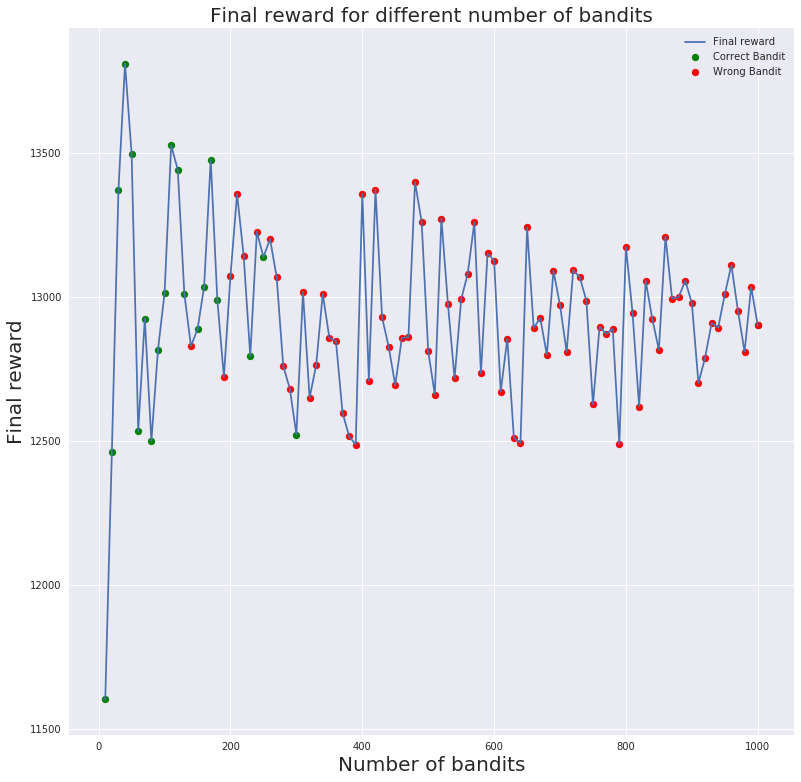

In [25]:
plt.figure(figsize=(13,13))
# k_values = list(range(50,1050,50))
k_values = list(range(10,1010,10))
plt.plot(k_values,total_rewards, label='Final reward')
# plt.plot(list(range(10,1010,10)),total_rewards)
for i in range(len(k_values)-1):
    if finding_best[i] == 1:
        plt.scatter(k_values[i],total_rewards[i], color='g')
    else:
        plt.scatter(k_values[i],total_rewards[i], color='r')
        
plt.scatter(k_values[i+1],total_rewards[i+1], color='g', label='Correct Bandit')
plt.scatter(k_values[i+1],total_rewards[i+1], color='r', label='Wrong Bandit')    
# plt.xticks(k_values)
plt.xlabel('Number of bandits',fontsize=20)
plt.ylabel('Final reward',fontsize=20)
plt.title('Final reward for different number of bandits',fontsize=20)
plt.legend()
plt.grid
plt.show()

### Comments
Based on the plot that we have provided, it can be appreaciated that it becomes harder for the model to find the best bandit to pull from as the number of bandits increase. The reason behind this is due to the number of episodes remain constant as we increase the number of bandits. So, the model would require more episodes to find the best bandit, when the number of bandits is high.

### 5. Repeat part 4 but now interleave policy learning for a certain number of iterations and then exploiting that policy during exploration in order to improve the model (Q-learning). 
The part 4 is repeated here, but the experiment do not specify the epsilon value. Instead the first 50 episodes is explicitly chosen to perform exploration and the next 50 episodes choose greedy agent.

In [26]:
def experiment_2(agent, bandit, N_episodes):
        action_history = []
        reward_history = []
        reward_per_bandit = np.zeros(bandit.k, dtype=np.float)
        commander = 0
        for episode in range(N_episodes):
            # Choose action from agent 
            if commander < 50:
                action = agent.choose_action(bandit, True)
    #             print(' Corresponding action: ', action)
                reward = bandit.get_reward(action)
                reward_per_bandit[action] += reward
    #             print(' r: ', reward)
                agent.update_Q(action, reward)
            else:
                if commander < 100:
                    action = agent.choose_action(bandit)
    #             print(' Corresponding action: ', action)
                    reward = bandit.get_reward(action)
                    reward_per_bandit[action] += reward
                else:
                    commander = 0
            commander += 1
            action_history.append(action)
            reward_history.append(reward)
        return np.array(action_history), np.array(reward_history), reward_per_bandit

In [27]:
# --------------------- 
#  k-bandit simulation           
# --------------------- 
bad_results = 0
iterations = 0
total_rewards = []
finding_best = []
epsilon = 0.0
n_episodes = 20000
n_experiments = 5

for k in range(10,1010,10):
    # number of bandits
    num_bandits = k
    expected_reward = np.zeros(num_bandits)
    print(' #----------------------------------------------------------------------------#')
    print(' Running bandits experiment with {} bandits and agent with epsilon of {}'.format(num_bandits, epsilon))

    reward_history_avg = np.zeros(n_episodes)
    action_history_sum = np.zeros((n_episodes, num_bandits))

    bandit_probs = [ np.round(np.random.rand(),2) for i in range(num_bandits)]

    best_bandit = np.argmax(bandit_probs)+1
#     print(' Probabilities calculated', bandit_probs)
    print(' Best expected bandit is ', best_bandit)

    for ex in range(n_experiments):

        bandit = Bandit(num_bandits,bandit_probs) # Initialize bandits
        agent = Agent(bandit, epsilon) # Initialize agents

        action_history, reward_history, reward_per_bandit = experiment_2(agent, bandit, n_episodes)

        # Sum up experiment reward 
        reward_history_avg += reward_history
        # print(' Reward history avg: ', reward_history_avg)

        # Sum up action history
        for episodes_idx, (a) in enumerate(action_history): 
            action_history_sum[episodes_idx][a] += 1
    

        expected_reward += np.round(reward_per_bandit/agent.n_actions,2)
    final_expected_reward = expected_reward/n_experiments
    
    # Average reward history over all the episodes for all the experiments
    reward_history_avg /= np.float(n_experiments)
    
    total_rewards.append(sum(reward_history_avg))
#     import pdb; pdb.set_trace()
#     print(' Action of last episode = {}'.format(action_history_sum[-1,:]))

#     print(' Total rewards per bandit = {}'.format(reward_per_bandit))

#     print(' Number of actions activated = {}'.format(agent.n_actions))

#     print(' Expected reward for pulling each arm = {}'.format(expected_reward))
    
    best_found_bandit = np.argmax(final_expected_reward)+1
    
    if best_bandit != best_found_bandit:
        bad_results += 1
        finding_best.append(0)
        print(' I am a bad model, I thought the best bandit was {}'.format(best_found_bandit))
    else:
        print(' I am a descent model, I found that the best bandit is {}'.format(best_found_bandit))
        finding_best.append(1)
    iterations += 1
print(' Master, I have failed {} times out of {} iterations'.format(bad_results, iterations))

 #----------------------------------------------------------------------------#
 Running bandits experiment with 10 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 7)
 I am a descent model, I found that the best bandit is 7
 #----------------------------------------------------------------------------#
 Running bandits experiment with 20 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 5)
 I am a descent model, I found that the best bandit is 5
 #----------------------------------------------------------------------------#
 Running bandits experiment with 30 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 2)
 I am a descent model, I found that the best bandit is 2
 #----------------------------------------------------------------------------#
 Running bandits experiment with 40 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 29)
 I am a bad model, I thought the best bandit was 11
 #--------------------------

 I am a bad model, I thought the best bandit was 319
 #----------------------------------------------------------------------------#
 Running bandits experiment with 350 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 142)
 I am a bad model, I thought the best bandit was 145
 #----------------------------------------------------------------------------#
 Running bandits experiment with 360 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 137)
 I am a bad model, I thought the best bandit was 72
 #----------------------------------------------------------------------------#
 Running bandits experiment with 370 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 129)
 I am a bad model, I thought the best bandit was 122
 #----------------------------------------------------------------------------#
 Running bandits experiment with 380 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 253)
 I am a bad model, I thought 

 I am a bad model, I thought the best bandit was 671
 #----------------------------------------------------------------------------#
 Running bandits experiment with 690 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 302)
 I am a bad model, I thought the best bandit was 562
 #----------------------------------------------------------------------------#
 Running bandits experiment with 700 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 74)
 I am a bad model, I thought the best bandit was 325
 #----------------------------------------------------------------------------#
 Running bandits experiment with 710 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 59)
 I am a bad model, I thought the best bandit was 192
 #----------------------------------------------------------------------------#
 Running bandits experiment with 720 bandits and agent with epsilon of 0.0
(' Best expected bandit is ', 470)
 I am a bad model, I thought t

The model fails 83 times out of 100 iterations!
   #### 1- Does this actually improve the model?
   It does not improve the model. Eventhough the model has computed more exploration, it is still random. Therefore, the model might get better or even worse.
      
   #### 2- Does it lead to premature converge to a sub-optimal policy?. 
   Yes, it leads to premature converge to sub-optimal policy.
      
   #### 3- Compare against part 4. 
   Since we have provided more exploration compared to 4th, this could avoid getting stuck in subpolicies.

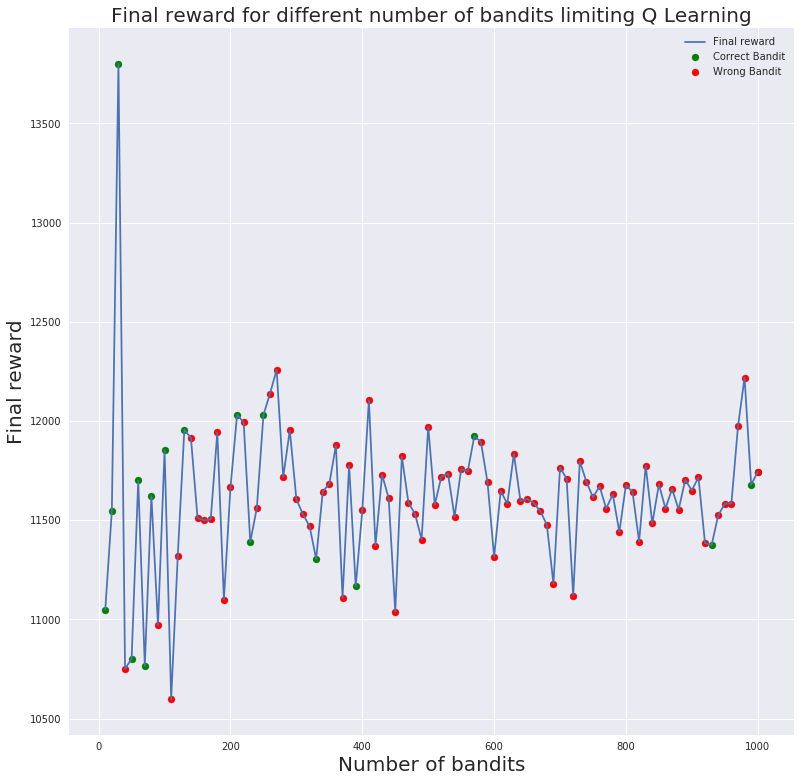

In [28]:
plt.figure(figsize=(13,13))
# k_values = list(range(50,1050,50))
k_values = list(range(10,1010,10))
plt.plot(k_values,total_rewards, label='Final reward')
# plt.plot(list(range(10,1010,10)),total_rewards)
for i in range(len(k_values)-1):
    if finding_best[i] == 1:
        plt.scatter(k_values[i],total_rewards[i], color='g')
    else:
        plt.scatter(k_values[i],total_rewards[i], color='r')
        
plt.scatter(k_values[i+1],total_rewards[i+1], color='g', label='Correct Bandit')
plt.scatter(k_values[i+1],total_rewards[i+1], color='r', label='Wrong Bandit')    
# plt.xticks(k_values)
plt.xlabel('Number of bandits',fontsize=20)
plt.ylabel('Final reward',fontsize=20)
plt.title('Final reward for different number of bandits limiting Q Learning',fontsize=20)
plt.legend()
plt.grid
plt.show()

#### Comments:
* The plot above shows the final reward obtained for each bandits. 
* When compared to 4th, the algorithm explores more, but it is still random.
* Hence the model prediction can get better or worse.

#### 6. Comments on the failure cases and sub-optimal policies based on the observations made during the experiment.

In first experiment, we have specified a epsilon value to be 0.1. The number of bandits considered is varied and experiment is conducted. The number of episodes is also kept constant. 
#### Observations: Model fails 80 times out of 100 iterations
As the number of k increases, the overall reward decreases. This is because, the number of episodes is kept constant. 

In the second experiment (5th question). Here, we do not specify the epsilon value. Instead the first 50 episodes is explicitly chosen to perform exploration and the next 50 episodes choose greedy agent.
#### Observations: Model fails 83 times out of 100 iterations
 Since the exploration is again randomly performed, the performance might get better or even worse. In our case, the experiment has gotten worse (fails 83 times).

In [29]:
# #------------------------------
# # Plot reward history
# #------------------------------
# plt.figure(figsize=(18, 12))
# plt.plot(reward_history_avg)
# plt.xlabel('Episode number')
# plt.ylabel('Rewards collected'.format(n_experiments))
# plt.title('Bandit reward history averaged over {} experiments(epsilon = {})'.format(n_experiments, epsilon))
# ax = plt.gca()
# ax.set_xscale('log', nonposx='clip')
# plt.xlim([1, n_episodes])
# plt.show()

# # =========================
# # Plot action history results
# # =========================
# plt.figure(figsize=(18, 12))
# for i in range(num_bandits):
#     action_history_sum_plot = 100 * action_history_sum[:,i] / n_experiments
#     plt.plot(list(np.array(range(len(action_history_sum_plot)))+1),
#                  action_history_sum_plot,
#                  linewidth=5.0,
#                  label="Bandit #{}".format(i+1))
# plt.title("Bandit action history averaged over {} experiments (epsilon = {})".format(n_experiments, epsilon), fontsize=26)
# plt.xlabel("Episode Number", fontsize=26)
# plt.ylabel("Bandit Action Choices (%)", fontsize=26)
# leg = plt.legend(loc='upper left', shadow=True, fontsize=26)
# ax = plt.gca()
# ax.set_xscale("log", nonposx='clip')
# plt.xlim([1, n_episodes])
# plt.ylim([0, 100])
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(16.0)
# plt.show()
